In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [3]:
df.shape

(519700, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [6]:
# drop the unesful culoms 
df.drop(['start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [7]:
df.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,Laguna St at Hayes St,San Francisco Public Library (Grove St at Hyde...,96,Customer


In [33]:
# here to make useful of the start time and added the month and day of week to analyze them.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['hourofday'] = df.start_time.dt.strftime('%H')
df['month'] = df['start_time'].apply(lambda x: x.strftime('%B').lower())
df['day_of_week'] = df['start_time'].apply(lambda x: x.strftime('%A').lower())

In [43]:
# List of days in order
day_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday']
# create ordered categorical variable
df['day_of_week'] = pd.Categorical(df['day_of_week'],
                                               categories= day_order,
                                               ordered = True)

In [10]:
df.month.value_counts()

october      108937
september     98558
november      95612
december      86539
august        83292
july          44073
june           2689
Name: month, dtype: int64

In [11]:
df.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,month,day_of_week
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,Laguna St at Hayes St,San Francisco Public Library (Grove St at Hyde...,96,Customer,december,sunday


In [12]:
# found how many station we have 
df.start_station_name.value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)           15187
The Embarcadero at Sansome St                                13664
San Francisco Caltrain (Townsend St at 4th St)               12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12055
Market St at 10th St                                         11960
                                                             ...  
Pierce Ave at Market St                                         11
Harmon St at Adeline St                                          6
Empire St at 1st St                                              5
Jackson St at 11th St                                            2
Ellsworth St at Russell St                                       1
Name: start_station_name, Length: 272, dtype: int64

### What is the structure of your dataset?
> The shape of the data set is (519700, 9), The colums are:

>> Trip Duration (seconds)

>>  Start Time and Date
  
>>  End Time and Date

>>    Start Station ID

>>   Start Station Name

>>   End Station Name

>>Bike ID

>>User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

>> month

>> day_of_month

### What is/are the main feature(s) of interest in your dataset?

> Avarge time trips , which user type most likley using the bike , Number of trips for each month

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

    The duration_sec column will help me in average trip time.

    month column will help me in monthly bike ride trends.
    
    user_type column will help me in the type average trip times.

## Univariate Exploration


In [3]:
# find the disribution for trip durations
binedges = np.arange(0, df['duration_sec'].max() + 100 ,100)
plt.hist(data = df, x = 'duration_sec', bins=binedges)
plt.xlim(0,6000)
plt.title('Distribution of various Trip Duration(s)')
plt.xlabel('Duration in Seconds')
plt.ylabel('Frequency');

NameError: name 'np' is not defined

from that i have see the majority of the durtion were on 500 sec to have a clear way i would convert the sec to min.

In [14]:
# add the duration_min to have easier understand of the durtion 
df['duration_min']= df['duration_sec'] / 60

In [2]:
# taking the avarge trip durations in minutes
plt.figure(figsize = [8,8])
bins = [0,10,20,30,40,50,60,70,80,90,100]
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration in minutes');
plt.title('Average Bike Trip Duration in minutes');
plt.ylabel('# of Trips');


NameError: name 'plt' is not defined

Here we are seeing that the avarge for the majority of trips are taking from 3-30 minutes

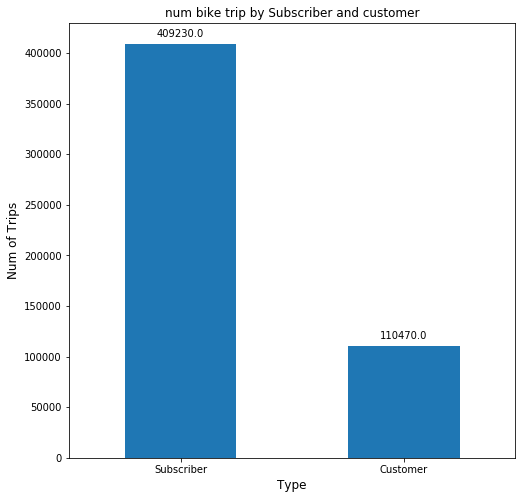

In [16]:
# find the number of bike trips for the user_type
axx=df.user_type.value_counts().plot(kind='bar',figsize=(8,8))
axx.set_xlabel("Type",fontsize=12)
axx.set_ylabel("Num of Trips",fontsize=12)
plt.title('num bike trip by Subscriber and customer');
plt.xticks(rotation = 0)
def add_value_labels(ax, spacing=5):
   
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there. 
# i used "https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart" to made this 
add_value_labels(axx)


From that we know that the subscribers are the majority with large deffrince than customers.

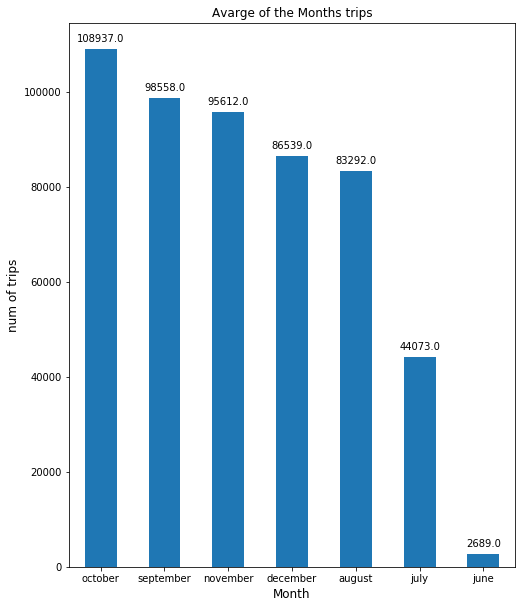

In [17]:
# avarge month trips for the months
axx=df.month.value_counts().plot(kind='bar',figsize=(8,10),title='Avarge of the Months trips');
axx.set_xlabel("Month",fontsize=12);
axx.set_ylabel("num of trips",fontsize=12);
plt.xticks(rotation = 0)
add_value_labels(axx)

We could see that october are busy month and have the largest amount of trips

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We could see from the plots above that i used a duration of the trips and months and the user type , i don’t think that it has any unusual points, i had to do a transformation for the duration trip from sec to min.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the start the distribution of duration trip were unusual but after converting it to minutes it become clear.

## Bivariate Exploration



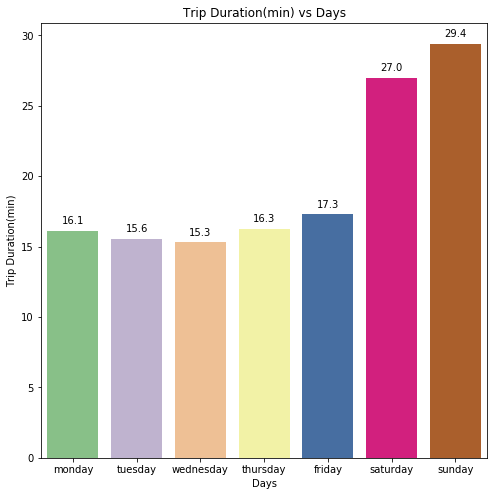

In [18]:
# find the relationship wetween trip duration and days
plt.figure(figsize = [8,8])
axx = sb.barplot(data=df,x='day_of_week',y='duration_min', color=sb.color_palette()[0], palette="Accent", ci=None)
plt.xlabel('Days')
plt.ylabel('Trip Duration(min)')
plt.title('Trip Duration(min) vs Days');
plt.xticks(rotation = 0)
add_value_labels(axx)

As we can see that on weekends the users are using there bikes longer than the rest of weekdays

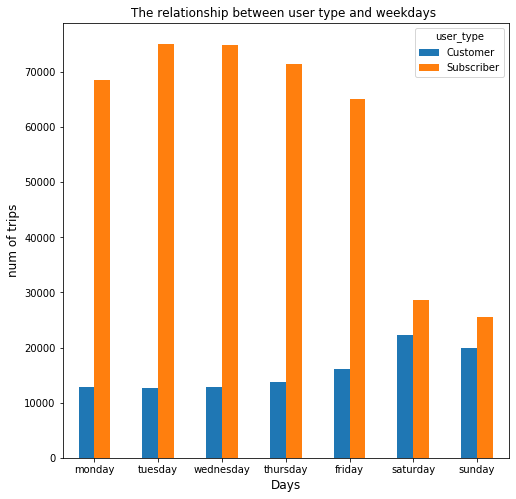

In [19]:
# find the relationship between user type and week days
axx = pd.crosstab(df['day_of_week'], df['user_type']).plot(kind='bar', stacked=False, title='The relationship between user type and weekdays ',figsize=(8,8));
axx.set_xlabel("Days",fontsize=12);
plt.xticks(rotation = 0)
axx.set_ylabel("num of trips",fontsize=12);

From that we could see that on weekends the customer and subscriber number are close not like other days 

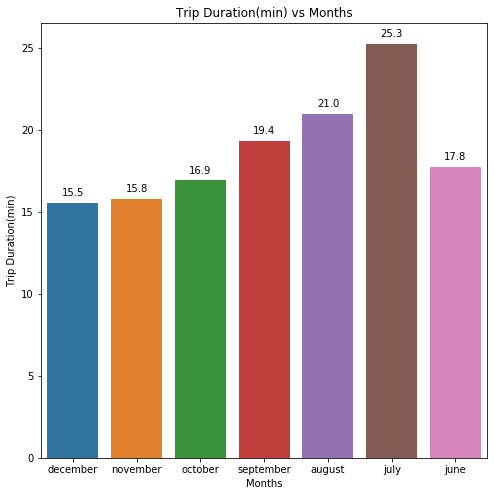

In [20]:
# the relationship between trip duration and months
plt.figure(figsize = [8,8])
axx = sb.barplot(data=df,x='month',y='duration_min', ci=None)
plt.xlabel('Months')
plt.ylabel('Trip Duration(min)')
plt.title('Trip Duration(min) vs Months');
plt.xticks(rotation =0)
add_value_labels(axx)

As we can see that on july and august people from that we see that users use the bike on summer season more than others 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I have seen that we have Positive relationship between weekdays and durtion.

> I have seen The relationship between user type and weekdays.

> I have seen that on summer months the users using the bike for longer trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I would say that The relationship between user type and weekdays was impress me because earlier i counted the user types and the subscribers were using the bikes much more than customers but when we saw that the majority of customers are using it only on weekends we could do something for weekinds to itract more customers.

## Multivariate Exploration



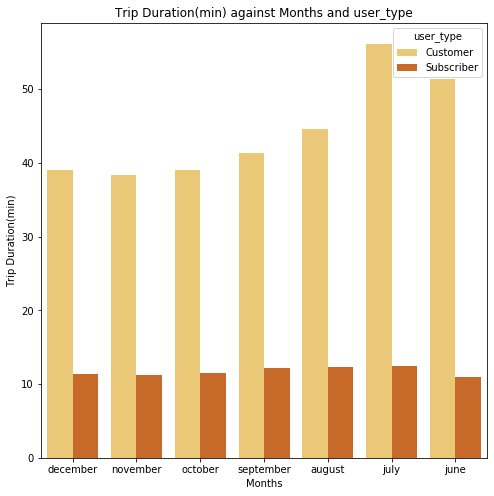

In [21]:
# i wanted to see the avarge trip duration on months for each user type.
plt.figure(figsize = [8,8]);
axx = sb.barplot(data=df,x='month',y='duration_min',hue='user_type' ,color=sb.color_palette()[0], palette='YlOrBr', ci=None);
plt.xlabel('Months');
plt.ylabel('Trip Duration(min)');
plt.title('Trip Duration(min) against Months and user_type');
plt.xticks(rotation = 0);


from that we saw thet customers oftenly using the bike much longer duration than the subscribers 

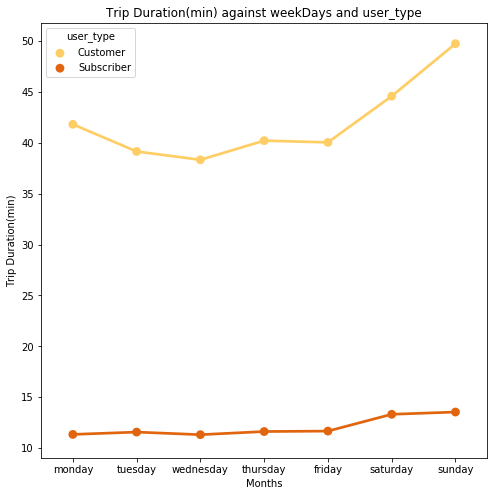

In [44]:
plt.figure(figsize = [8,8]);
axx = sb.pointplot(data=df,x='day_of_week',y='duration_min',hue='user_type' ,color=sb.color_palette()[0], palette='YlOrBr', ci=None);
plt.xlabel('Months');
plt.ylabel('Trip Duration(min)');
plt.title('Trip Duration(min) against weekDays and user_type');
plt.xticks(rotation = 0);


From that we have notice that the customer and subscriber are using bikes much more on weekends

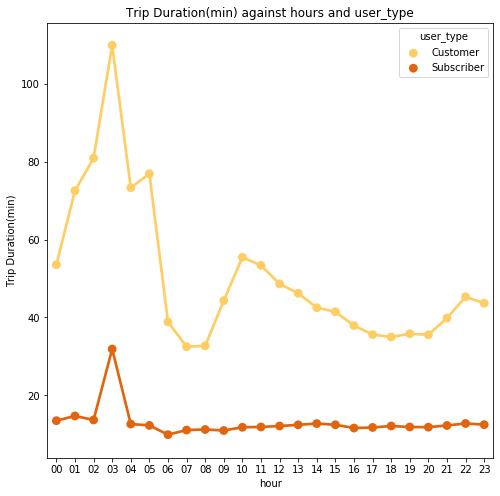

In [37]:
plt.figure(figsize = [8,8]);

axx = sb.pointplot(data=df,x='hourofday',y='duration_min',hue='user_type' ,color=sb.color_palette()[0], palette='YlOrBr', ci=None);
plt.xlabel('hour');
plt.ylabel('Trip Duration(min)');
plt.title('Trip Duration(min) against hours and user_type');
plt.xticks(rotation = 0);

From that we could see that trips that started at 3 am the durtion of it is higher

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I have made a relationship between months and user_type against Trip duration 

### Were there any interesting or surprising interactions between features?

> We saw that customers oftenly using the bike much longer duration than the subscribers .  from that we could make some assuptions and may it lead to some ideas we could profit from them.